### Import relevant libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML
from itertools import combinations, product

#### Load dataset 

In [2]:
marketing_data = pd.read_csv("data/marketing_campaign.csv")

#### Create Summary Statistics function

In [3]:
def dataframe_side_by_side(*dataframes):
    html = '<div style="display:flex">'
    for dataframe in dataframes:
        html += '<div style="margin-right: 2em">'
        html += dataframe.to_html()
        html += '</div>'
    html += '</div>'
    display(HTML(html))
    
def summary_stats_analyzer(data):
    df1 = data.describe(include='object')
    df2 = data.describe()
    return dataframe_side_by_side(df1,df2)

In [4]:
summary_stats_analyzer(marketing_data)

#### Identify numeric and categorical datatypes

In [5]:
categorical_cols = marketing_data.select_dtypes(include = 'object').columns
categorical_cols[:4]

Index(['Education', 'Marital_Status', 'Dt_Customer'], dtype='object')

In [6]:
discrete_cols = [col for col in marketing_data.select_dtypes(include = 'number') if marketing_data[col].nunique() < 15]
discrete_cols[:4]

['Kidhome', 'Teenhome', 'NumCatalogPurchases', 'NumStorePurchases']

In [7]:
numerical_cols = [col for col in marketing_data.select_dtypes(include = 'number').columns if col not in discrete_cols] 
numerical_cols[:4]

['Unnamed: 0', 'ID', 'Year_Birth', 'Income']

#### Create Univariate analysis function

In [8]:
def univariate_analyzer (data,subset):
    categorical_cols = data.select_dtypes(include = 'object').columns
    discrete_cols = [col for col in data.select_dtypes(include = 'number') if data[col].nunique() < 15]
    numerical_cols = [col for col in data.select_dtypes(include = 'number').columns if col not in discrete_cols]
    all_cols = data.columns
    
    plots = []
    if subset == 'cat':
        print("categorical variables: ", categorical_cols)
        for i in categorical_cols:
            plt.figure()
            chart = sns.countplot(data = data, x= data[i])
            plots.append(chart)
    elif subset == 'num':
        print("Numerical variables: ", numerical_cols)
        for i in numerical_cols:
            plt.figure()
            chart = sns.histplot(data = data, x= data[i])
            plots.append(chart)
    elif subset == 'discrete':
        print("Discrete variables: ", discrete_cols)
        for i in discrete_cols:         
            plt.figure()
            chart = sns.countplot(data = data, x= data[i])
            plots.append(chart)
    else:
        for i in all_cols:
            if i in categorical_cols:
                plt.figure()
                chart = sns.countplot(data = data, x= data[i])
                plots.append(chart)
            elif i in numerical_cols:
                plt.figure()
                chart = sns.histplot(data = data, x= data[i])
                plots.append(chart)
            elif i in discrete_cols:
                plt.figure()
                chart = sns.countplot(data = data, x= data[i])
                plots.append(chart)
            else:
                pass
            
    for plot in plots:
        print(plot)

#### Perform Univariate analysis

C:\Users\ay_de\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.

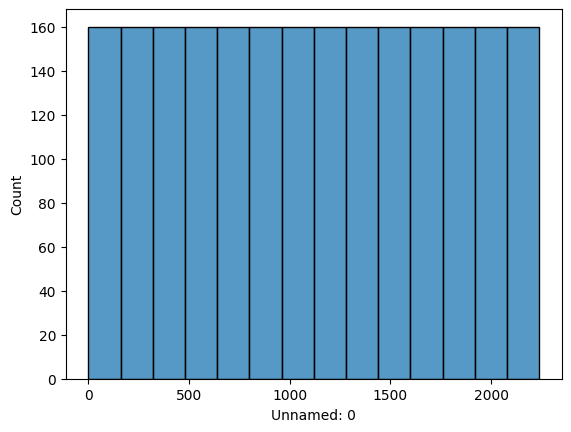

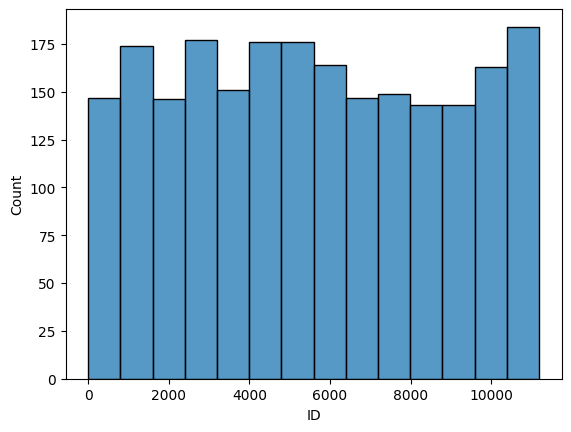

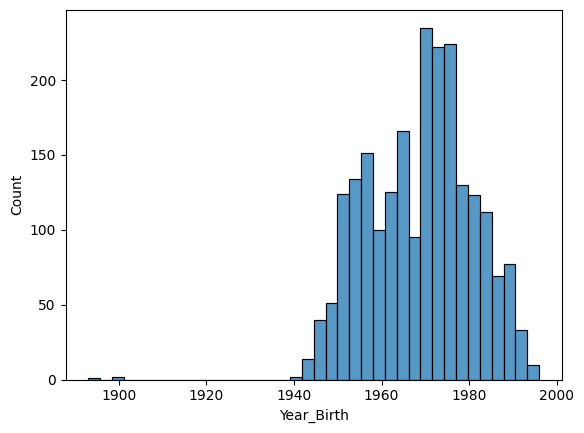

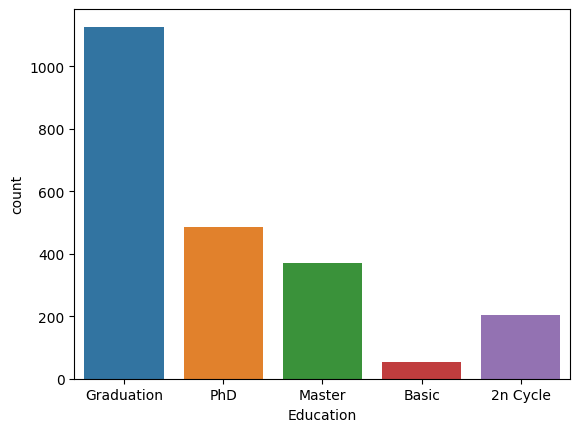

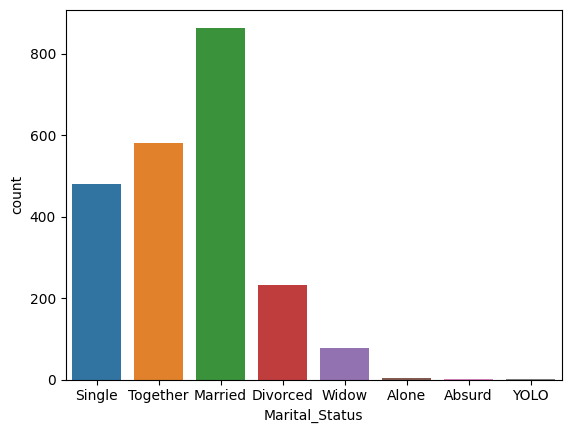

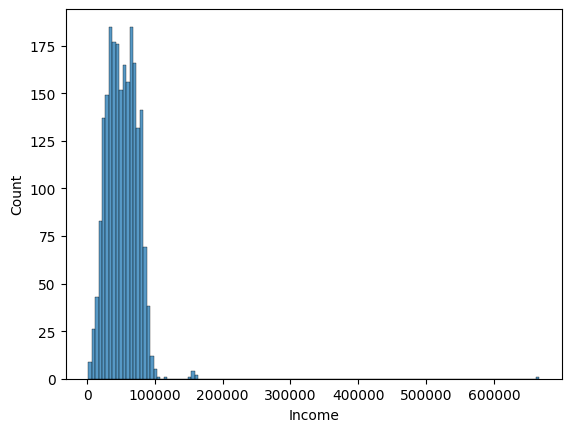

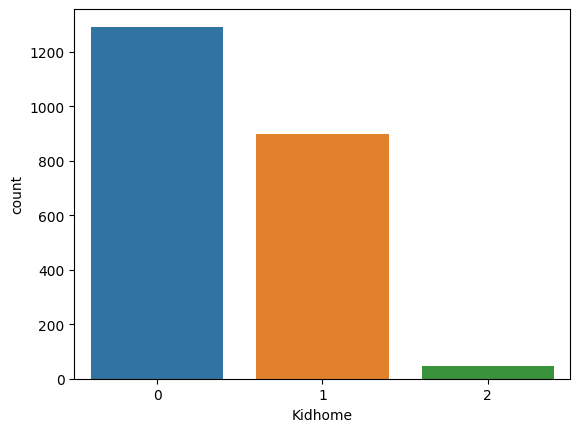

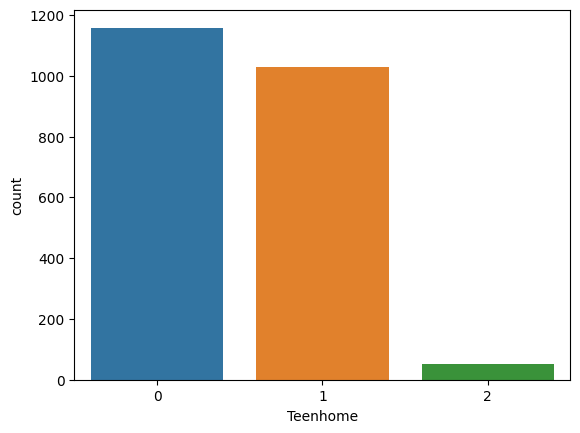

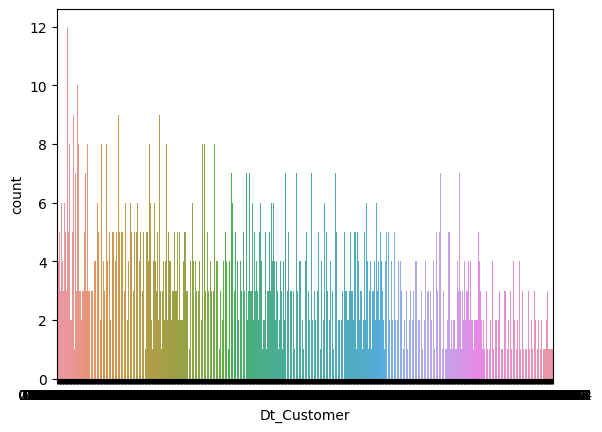

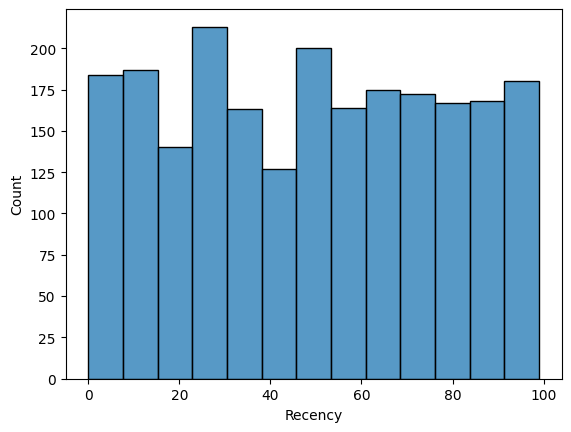

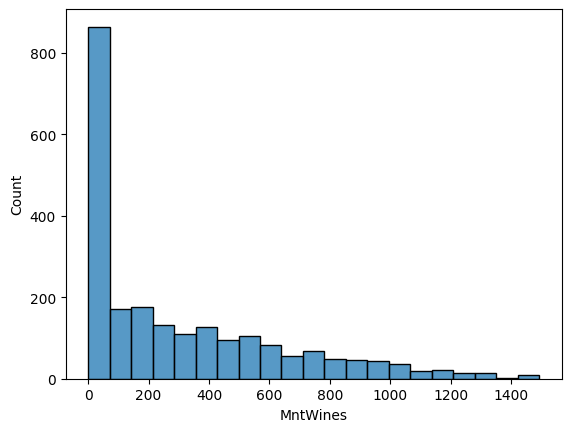

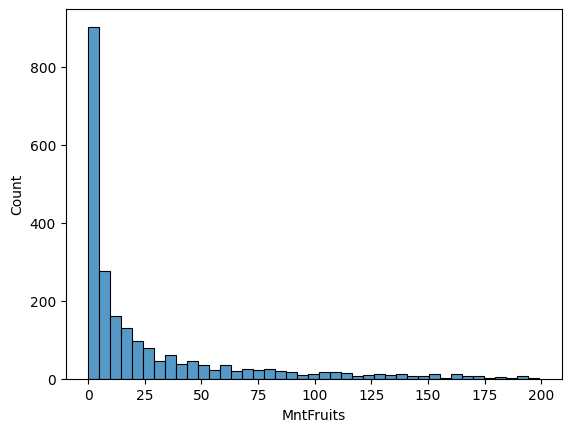

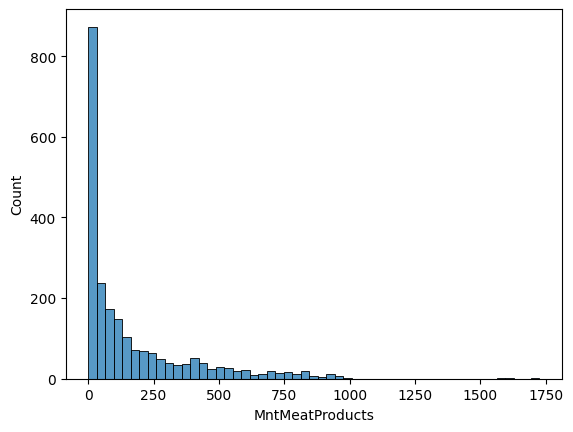

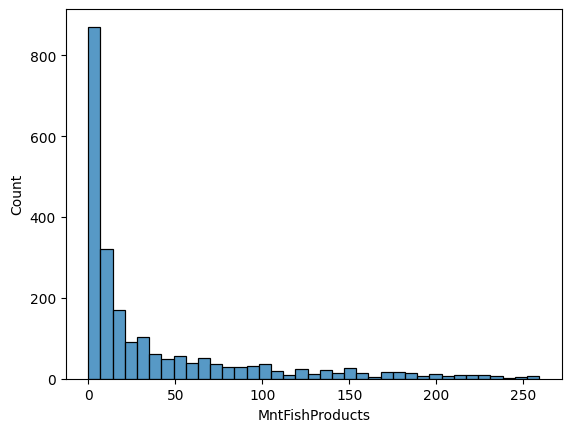

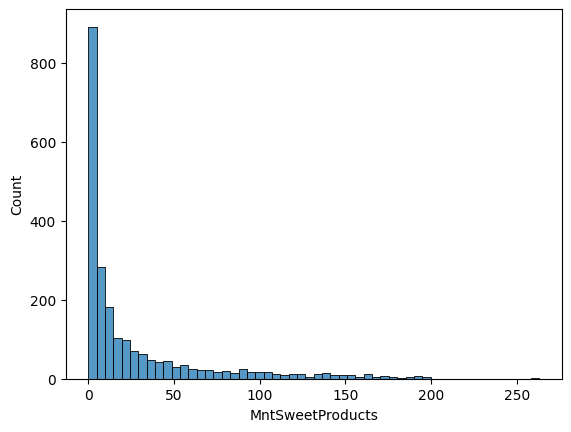

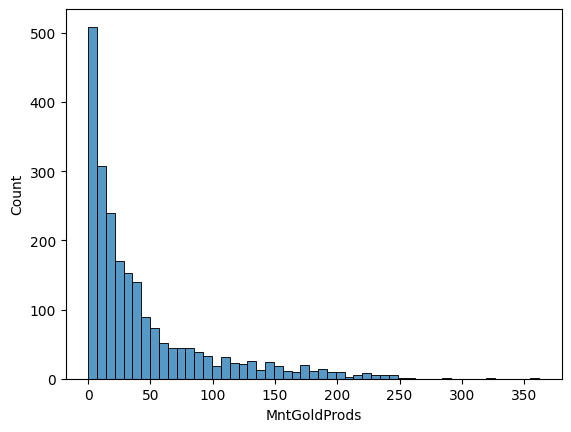

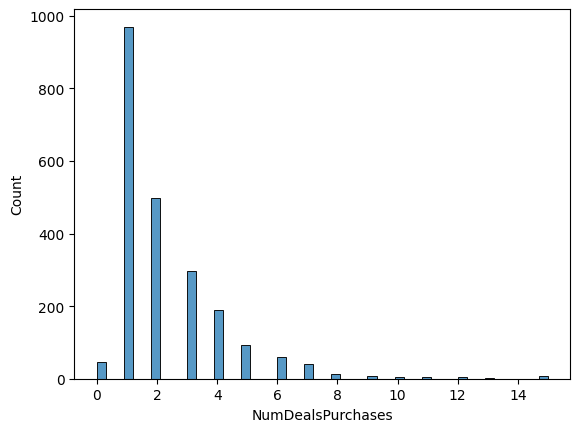

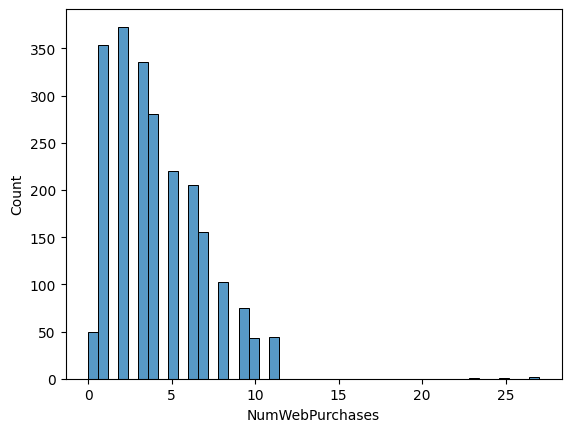

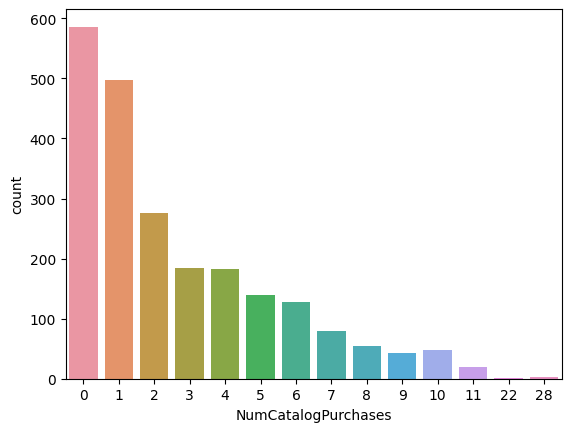

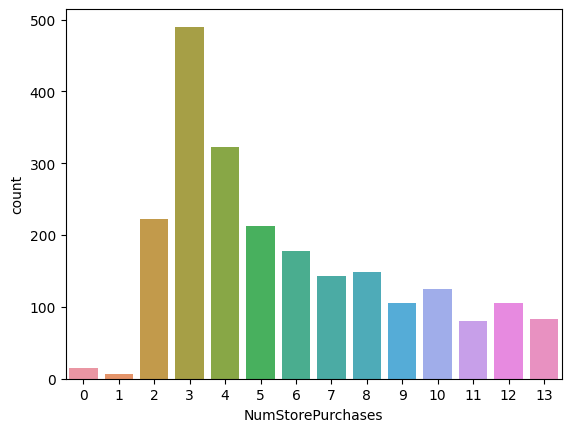

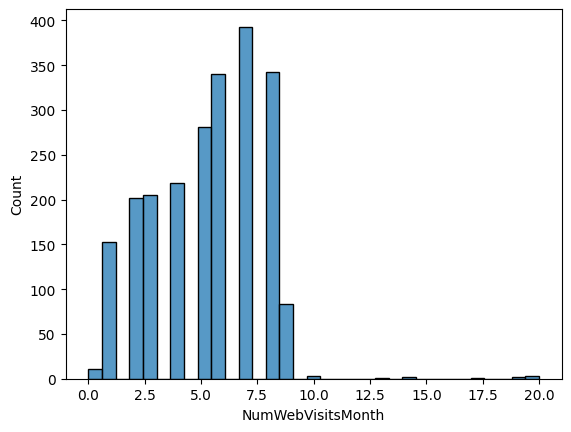

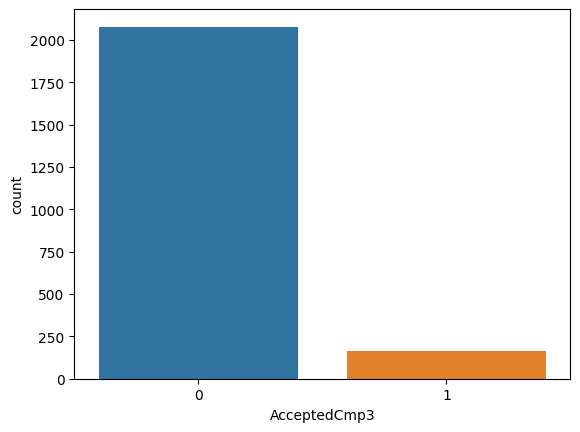

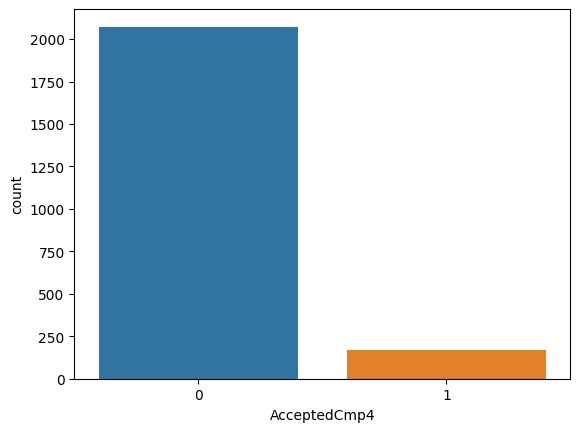

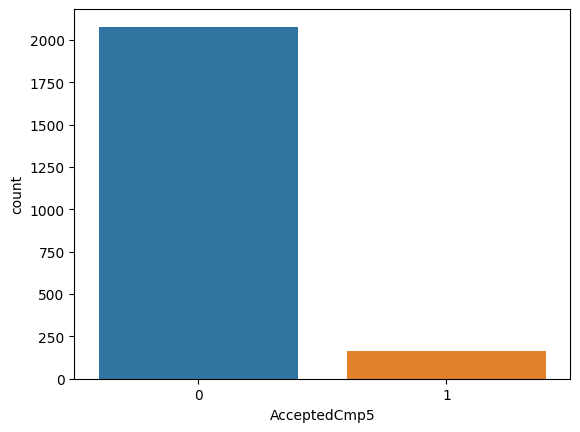

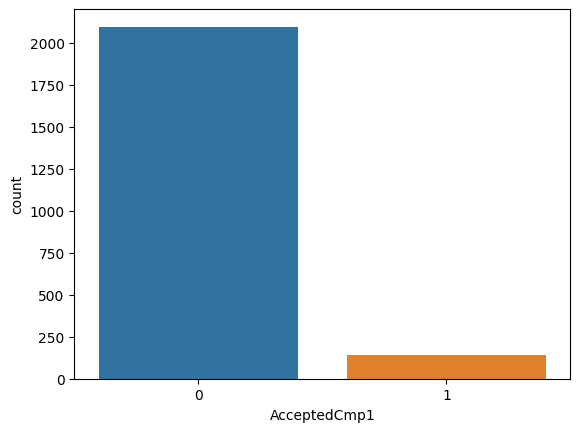

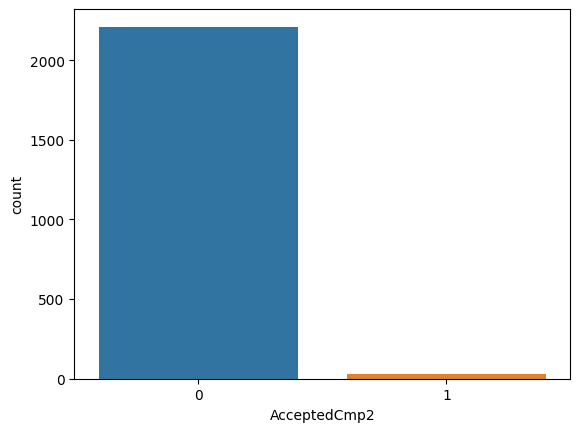

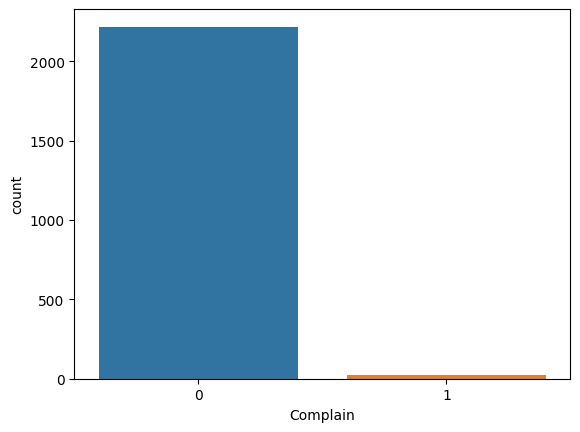

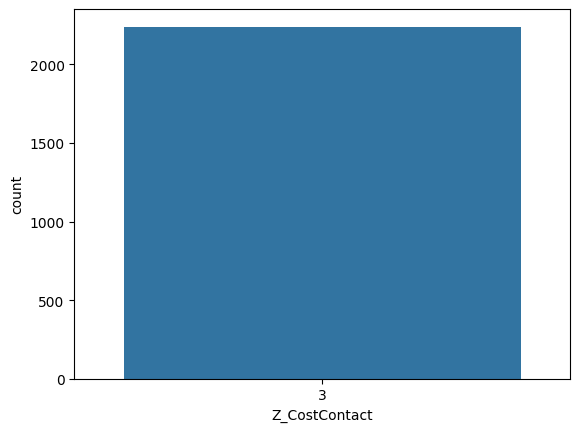

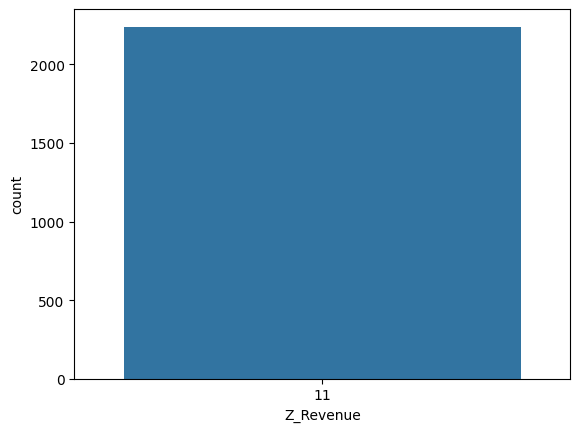

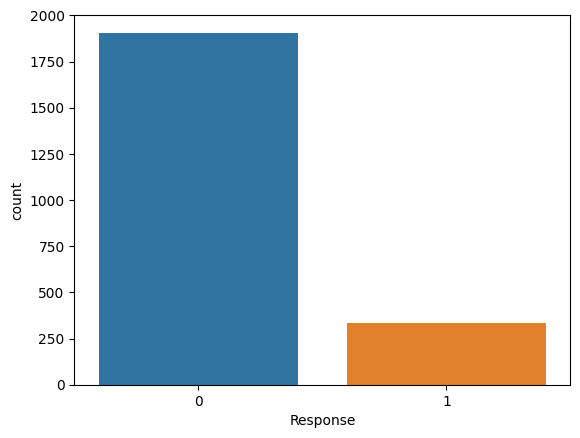

In [9]:
univariate_analyzer(marketing_data,'all')

#### Create Bivariate Analysis function

In [10]:
#create a subset of columns to reduce number of charts to be created. Without this over 400 charts will be created
marketing_sample = marketing_data[['Education', 'Marital_Status', 'Income', 'Kidhome', 'MntWines',
                                   'MntMeatProducts', 'NumWebPurchases', 'NumWebVisitsMonth','Response']]

In [11]:
#Identify all categorical, discreet and numerical columns
categorical_cols_ = marketing_sample.select_dtypes(include = 'object').columns
discrete_cols_ = [col for col in marketing_sample.select_dtypes(include = 'number') if marketing_sample[col].nunique() < 15]
numerical_cols_ = [col for col in marketing_sample.select_dtypes(include = 'number').columns if col not in discrete_cols]

In [12]:
#Create numerical - categorical column pairs
num_cat = [(i,j) for i in numerical_cols_ for j in categorical_cols_ ]    
num_cat[:4]

[('Income', 'Education'),
 ('Income', 'Marital_Status'),
 ('MntWines', 'Education'),
 ('MntWines', 'Marital_Status')]

In [13]:
#Create unique categorical - categorical column pairs
cat_cat = [t for t in combinations(categorical_cols_, 2)]
cat_cat[:4]

[('Education', 'Marital_Status')]

In [14]:
#Create unique numerical - numerical column pairs
num_num = [t for t in combinations(numerical_cols_, 2)]   
num_num[:4]

[('Income', 'MntWines'),
 ('Income', 'MntMeatProducts'),
 ('Income', 'NumWebPurchases'),
 ('Income', 'NumWebVisitsMonth')]

In [15]:
#Create discrete - numerical column pairs
dis_num = [(i,j) for i in discrete_cols_ for j in numerical_cols_ if i != j] 
dis_num[:4]

[('Kidhome', 'Income'),
 ('Kidhome', 'MntWines'),
 ('Kidhome', 'MntMeatProducts'),
 ('Kidhome', 'NumWebPurchases')]

In [16]:
#Create discrete - categorical column pairs
dis_cat = [(i,j) for i in discrete_cols_ for j in categorical_cols_ if i != j] 
dis_cat[:4]

[('Kidhome', 'Education'),
 ('Kidhome', 'Marital_Status'),
 ('Response', 'Education'),
 ('Response', 'Marital_Status')]

In [17]:
def bivariate_analyzer (data):
    categorical_cols_ = data.select_dtypes(include = 'object').columns
    discrete_cols_ = [col for col in data.select_dtypes(include = 'number') if data[col].nunique() < 15]
    numerical_cols_ = [col for col in data.select_dtypes(include = 'number').columns if col not in discrete_cols_]
    
    num_num = [t for t in combinations(numerical_cols_, 2)]   
    cat_cat = [t for t in combinations(categorical_cols_, 2)]
    num_cat = [(i,j) for i in numerical_cols_ for j in categorical_cols_ ]  
    dis_num = [(i,j) for i in discrete_cols_ for j in numerical_cols_ if i != j] 
    dis_cat = [(i,j) for i in discrete_cols_ for j in categorical_cols_ if i != j] 
    
    
    plots = []
    for i in num_num:
        plt.figure()
        chart = sns.scatterplot(data = data, x= data[i[0]], y= data[i[1]])
        plots.append(chart)
    for i in num_cat:
        plt.figure()
        chart = sns.boxplot(data = data, x= data[i[1]], y= data[i[0]] )
        plots.append(chart)
    for i in dis_num:
        plt.figure()
        chart = sns.boxplot(data = data, x= data[i[0]], y= data[i[1]] )
        plots.append(chart)
    for i in cat_cat:
        plt.figure()
        cross = pd.crosstab(index= data[i[0]], columns= data[i[1]])
        chart = cross.plot(kind="bar", stacked=True,rot=0)
        plots.append(chart)
    for i in dis_cat:
        plt.figure()
        cross = pd.crosstab(index= data[i[1]], columns= data[i[0]])
        chart = cross.plot(kind="bar", stacked=True,rot=0)
        plots.append(chart)
    else:
         pass
            
    for plot in plots:
        print(plot)

#### Perform Bivariate analysis

C:\Users\ay_de\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.

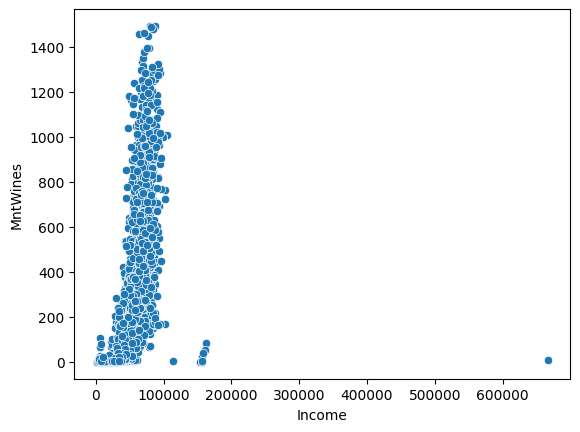

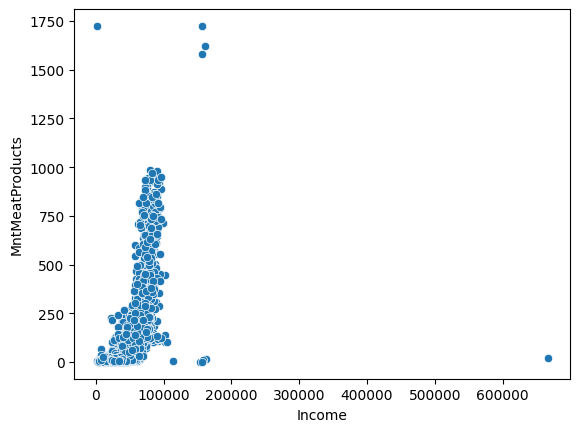

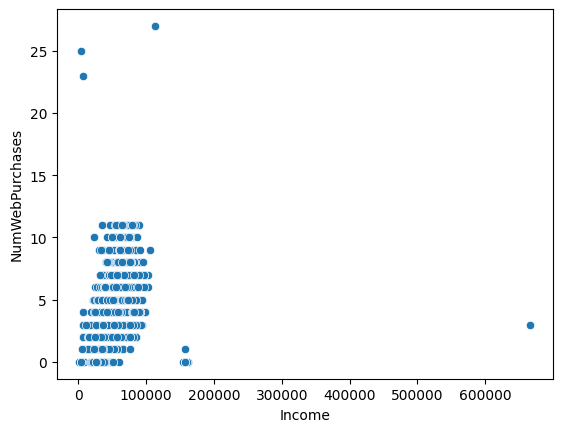

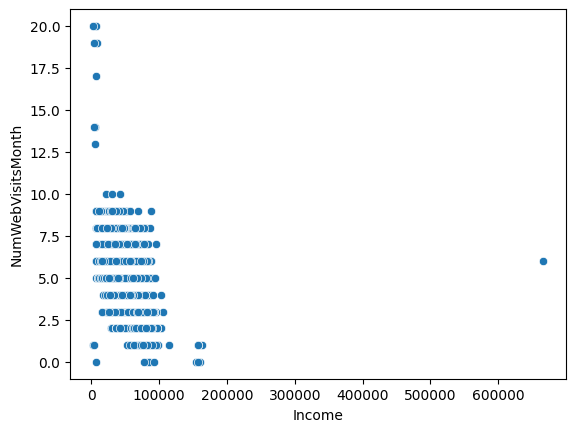

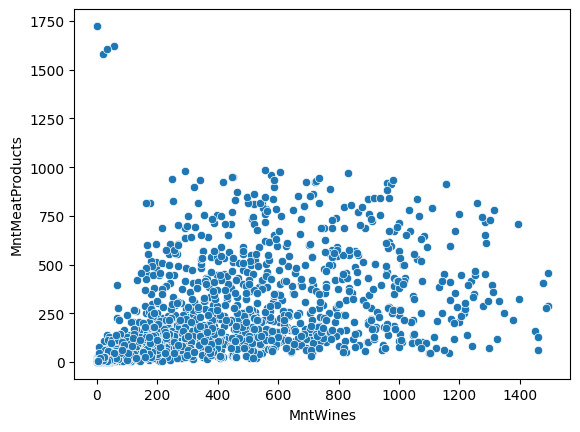

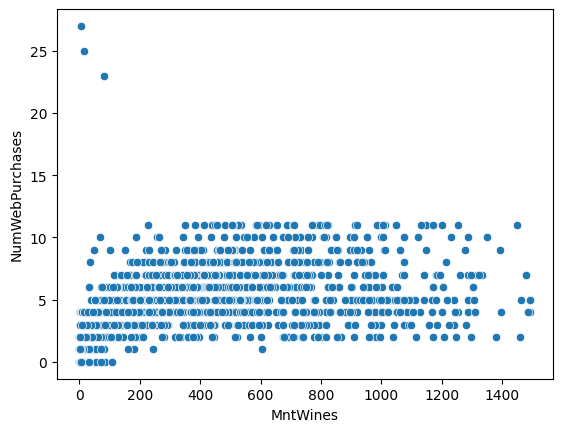

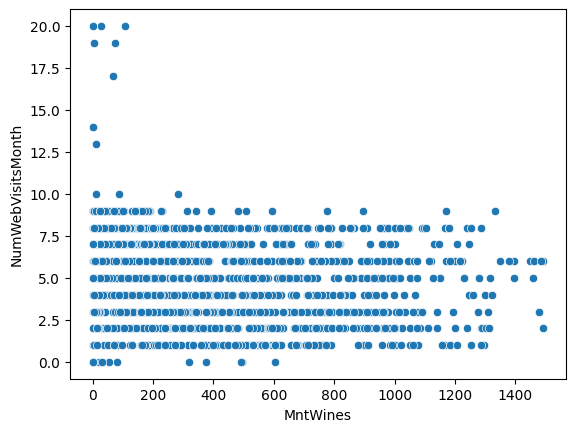

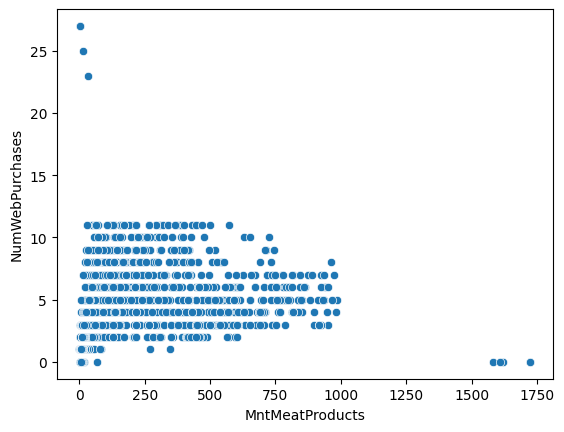

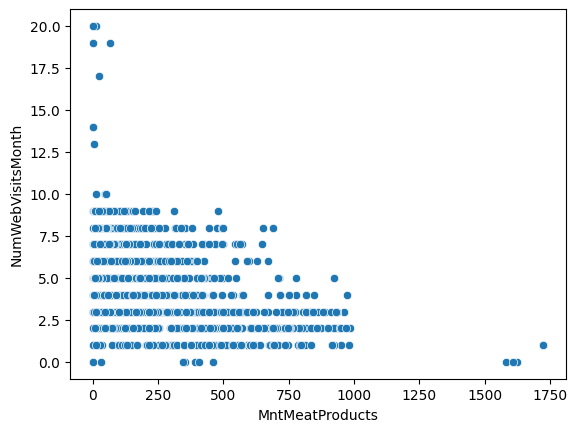

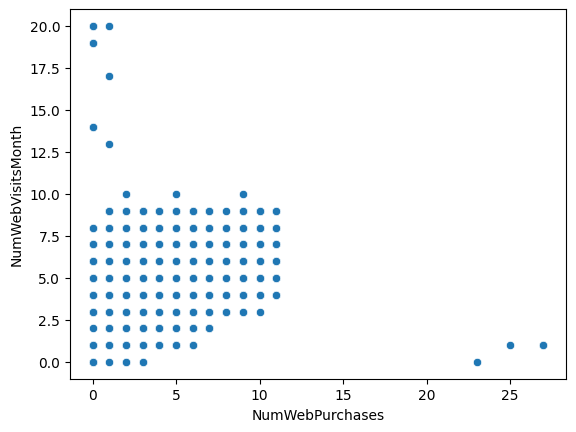

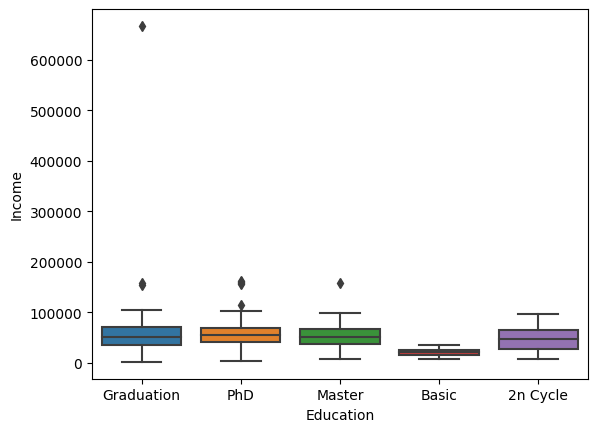

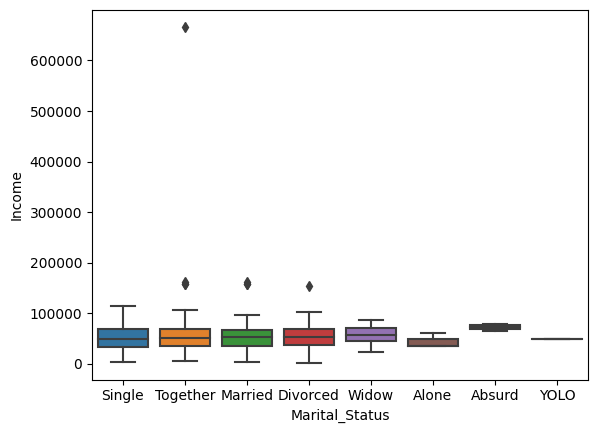

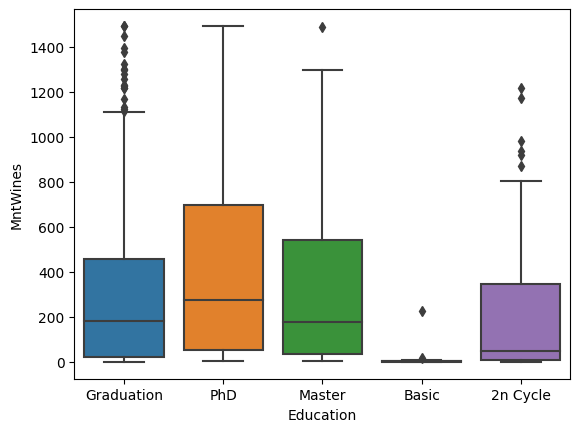

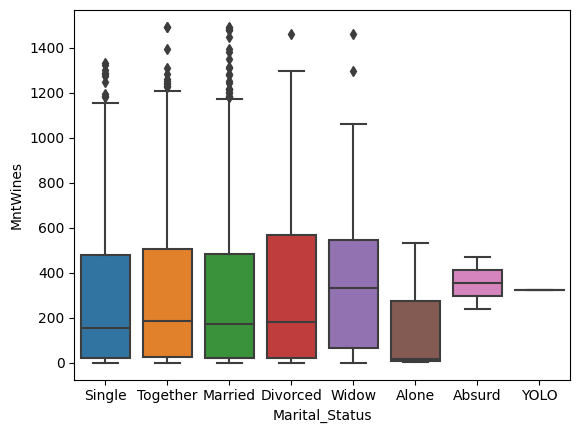

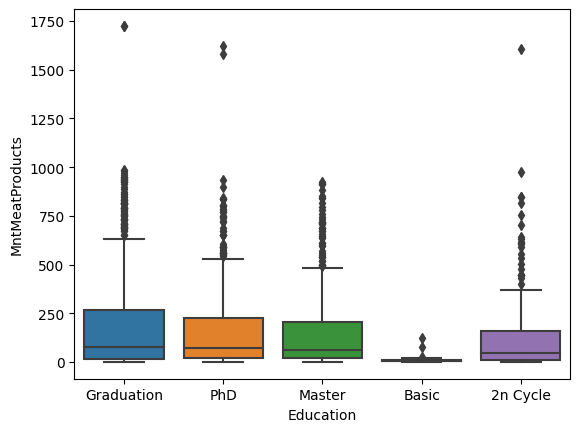

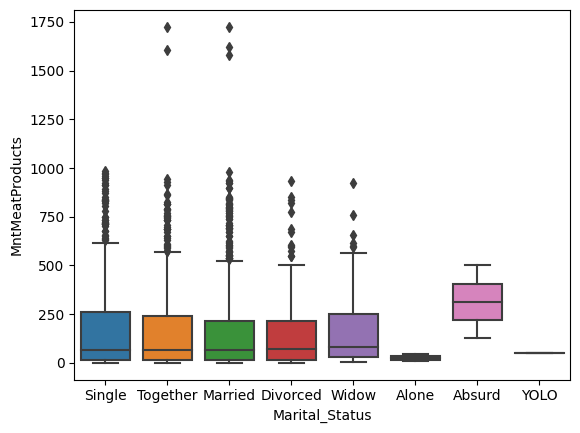

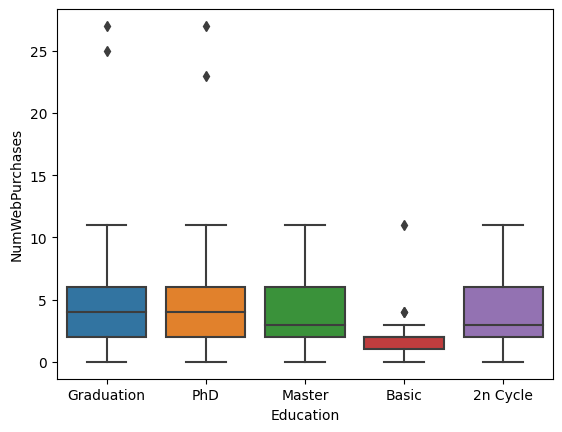

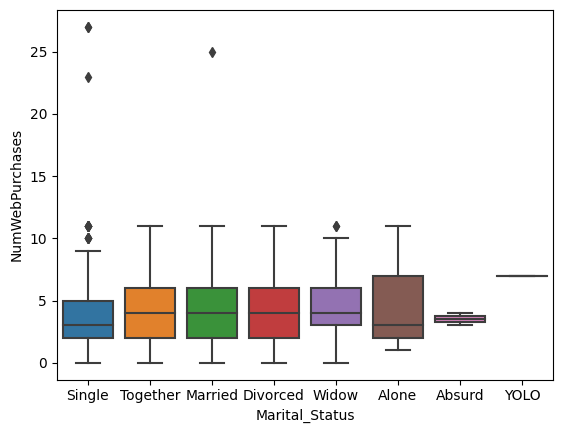

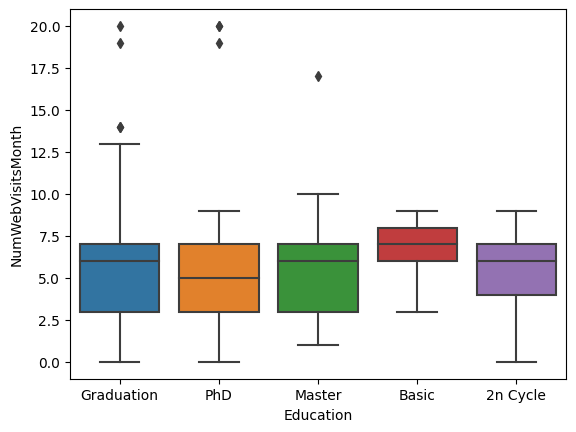

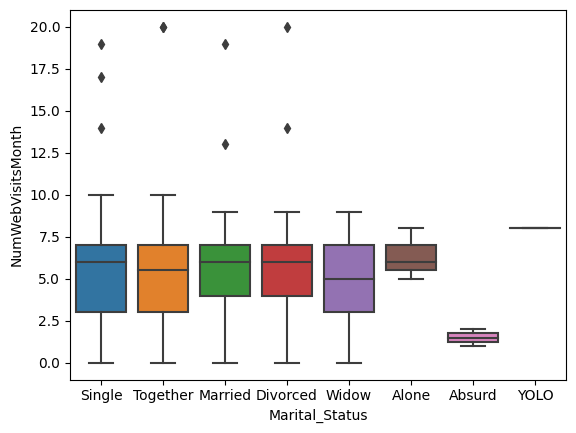

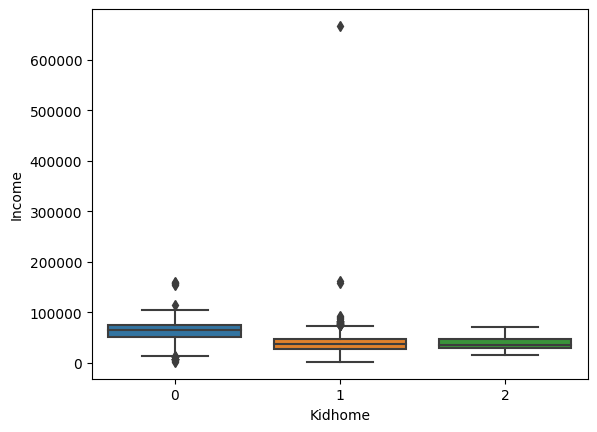

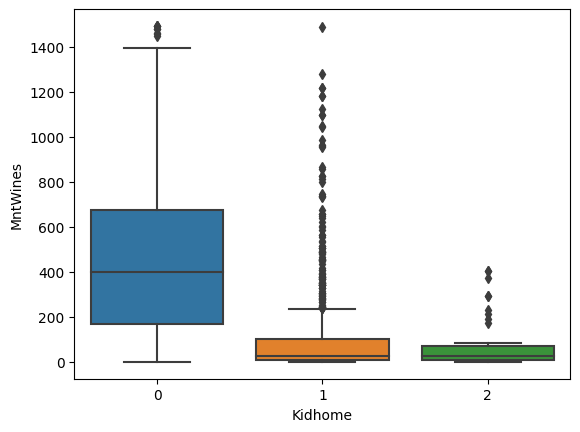

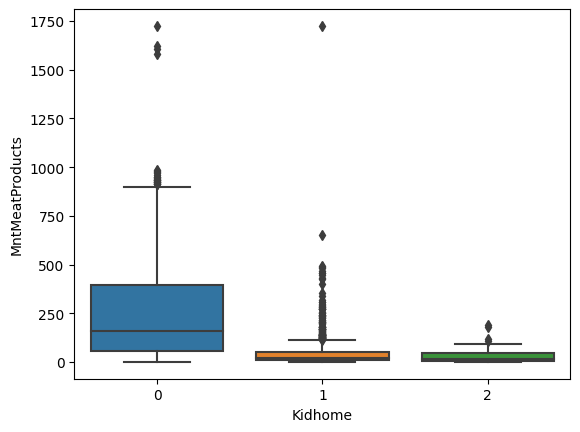

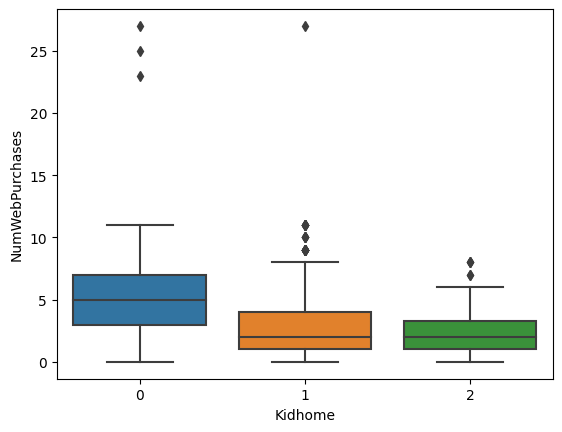

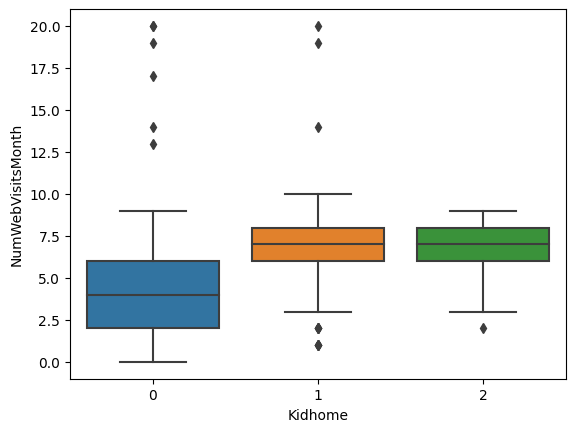

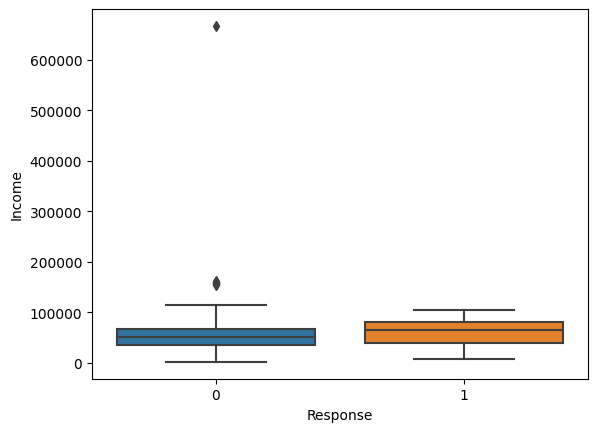

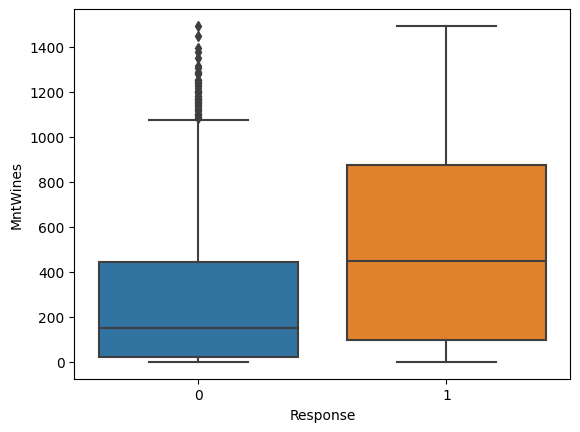

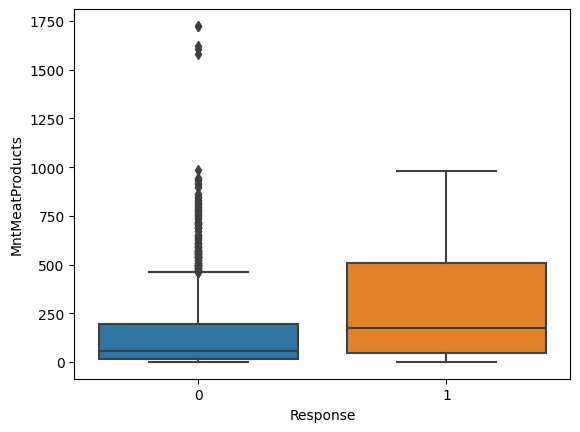

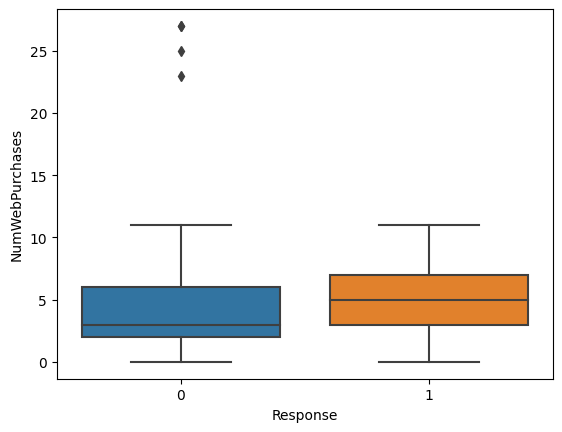

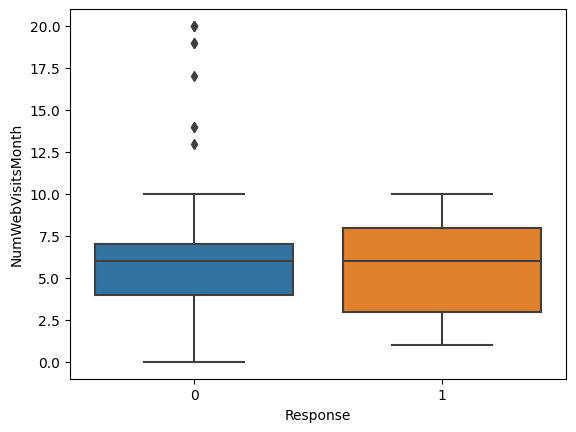

<Figure size 640x480 with 0 Axes>

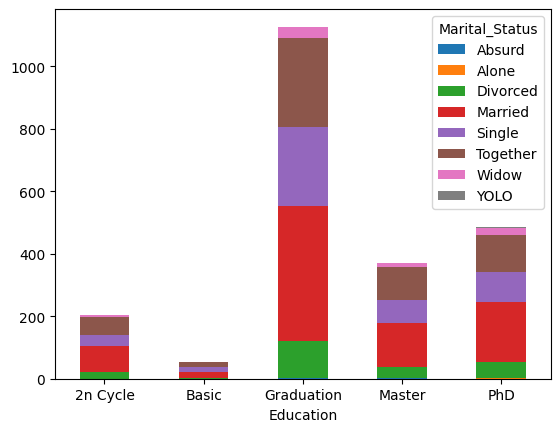

<Figure size 640x480 with 0 Axes>

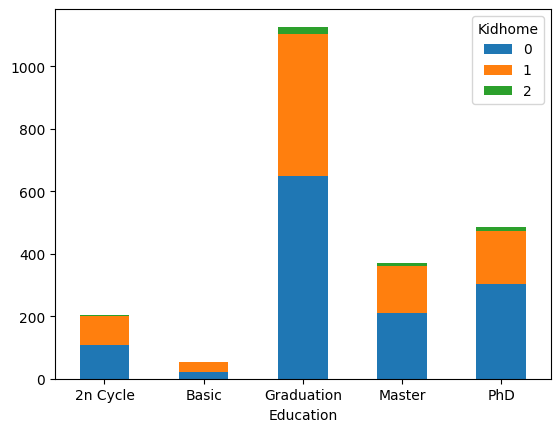

<Figure size 640x480 with 0 Axes>

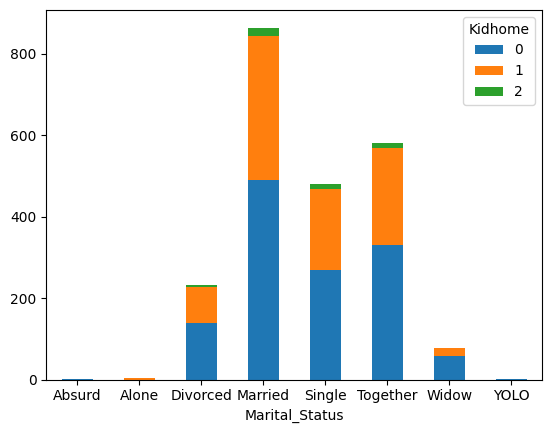

<Figure size 640x480 with 0 Axes>

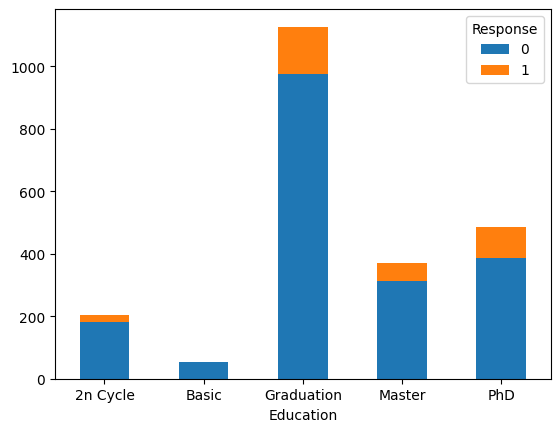

<Figure size 640x480 with 0 Axes>

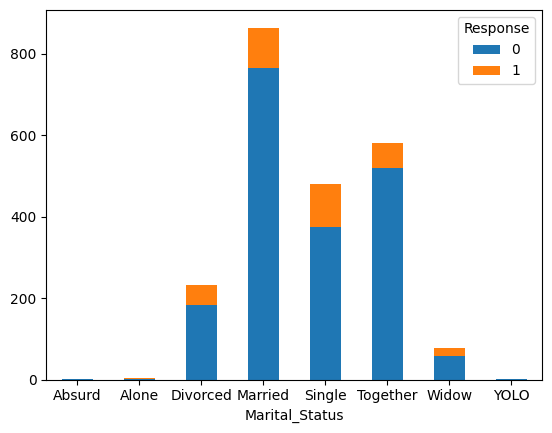

In [18]:
bivariate_analyzer(marketing_sample)